# Project: Drag & Diffusion in Velocity Space

In this project, we are going to look at relaxation in a thermal plasma

In [ ]:
#
# Moving on to warm plasma
# and dispersion relations that have a wavenumber dependence
#
# This animation shows electrons (blue) oscillating against a fixed ion background (red).
#
from IPython.display import IFrame
IFrame(src="Langmuir_wave.gif",width=300,height=300)  # retrieved from http://space.irfu.se/~andris/plasma/waves/Langmuir_wave.gif

## Setting up a warm plasma
### This example below is taken from the EPW-dispersion notebook from the same repo

We'll still assume:

* $\nabla \times \vec{E} = 0$ -- Longitudinal (electrostatic) waves  

* $\vec{B}_0 = 0$ -- Unmagnetized

but now

* $T_e \neq 0$ -- Warm fluid  

And from the start we'll assume that the ions do not move.

Here the time derivative of Ampere's law in the unmagnetized case gives:

$$ \frac{\partial^2}{\partial t^2}\vec{E} - \frac{en_0}{\epsilon_0}\frac{\partial \vec{v}_e}{\partial t} = 0 $$

And using Euler's equation in a warm plasma now gives:

$$ \frac{\partial^2}{\partial t^2}\vec{E} - \frac{e n_0}{\epsilon_0}\left[-\frac{e}{m_e}\vec{E} - \frac{\gamma k T_e}{m_e n_0}\nabla n_1\right] = 0 $$

To get the wave equation for $\vec{E}$, we must find $n_1$ in terms of $E$.  To do this we use Gauss' Law:

$$\nabla \cdot \vec{E} = -\frac{e n_1}{\epsilon}$$

so

$$\nabla n_1 = -\frac{\epsilon_0}{e} \nabla(\nabla \cdot \vec{E}) = -\frac{\epsilon_0}{e} \nabla^2 \vec{E}$$

where we used the fact that $\nabla(\nabla \cdot \vec{E}) = \nabla^2 \vec{E}$ when $\nabla \times \vec{E} = 0$.

Now we can write the equation purely in terms of $\vec{E}$:

$$ \frac{\partial^2}{\partial t^2}\vec{E} + \frac{e^2 n_0}{m_e \epsilon_0}\vec{E} - \frac{\gamma k T_e}{m_e}\nabla^2\vec{E} = 0 $$

For high frequency waves there is no time for any heat loss and we use $\gamma = 3$, i.e., the adiabatic equation of state for these 1D longitudinal oscillations.  $\gamma = 3$ also follows from a more rigorous kinetic treatment.  We can also substitute in $\omega_p$ and $v_{the}$.

$$ \frac{\partial^2}{\partial t^2}\vec{E} + \omega_p^2\vec{E} - 3 v_{the}^2\nabla^2\vec{E} = 0 $$

Fourier Analyzing with $\vec{E} = \vec{\bar{E}}e^{i(kx-\omega t)}$,

$$ [-\omega^2 + \omega_p^2 + 3 v_{the}^2 k^2]\vec{\bar{E}}e^{i(kx-\omega t)} = 0 $$

giving the dispersion relation:

$$ \omega^2 = \omega_p^2 + 3 v_{the}^2 k^2 $$

In [7]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#
# Plotting w(k) = sqrt[w_p^2 + 3 * v_the^2 * k^2]
#
def epwdisp(wp,vth):
    #
    # Plotting w(k) = sqrt[w_p^2 + 3 * v_the^2 * k^2]
    #
    x = np.linspace(-25,25,100)
    y = np.sqrt(wp**2 + 3 * vth**2 * x**2)
    plt.plot(x,y)
    plt.xlabel('k [$c/\omega_p$]'); plt.ylabel('$\omega$ (in units of $\omega_p$)'); plt.xlim(-25,25); plt.ylim(0,4)
    plt.grid(b=True, which='major', axis='both')
    plt.show()
    
ipywidgets.interact(epwdisp,wp=(0.0,2.0),vth=(0.0,0.5,0.01),continuous_update=False);

interactive(children=(FloatSlider(value=1.0, description='wp', max=2.0), FloatSlider(value=0.25, description='…

# Simulations with a Particle-in-Cell Code

This simulation leverages off the EPW dispersion notebook so the simulation parameters are identical.  But we added a test charge species, initially situated at 4*$v_{th}$.  


In this project, we will simulate plasmas in which each plasma electron is initialized with positions (only in x, or what we call $x_1$) such that the density is uniform. The ions are initialized at the same positions but they have an infinite mass.  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction with thermal velocities ($vth_1$, $vth_2$, $vth_3$) that will be varied. The particles then begin to move in the self-consistent fields that their current and charge density produce.

* The length of the plasmas is 50 $c/\omega_p$
* The simulation will run for a time 400 $1/\omega_p$.
* The simulation uses 50,000 particles.

You will be looking at plots of the electric field in the $x_1$ direction, $E_1$. 

Let's re-visit the EPW notebook and make sure the test charges did not modify the dispersion relation

### The following lines must always be executed before running anything else.

Reminder: Hit Shift+Enter to run a cell, or select the cell and click on the "Run" button in the top menu bar

In [8]:
import osiris

%matplotlib inline

## Run a case in which $vth_1=vth_2=vth_3=0.02 c$.

In [4]:
# vth/c = 0.02
dirname = 'v02-v08'
osiris.runosiris(rundir=dirname,inputfile='v02-v08.txt')

runosiris completed normally


After the simulation is finished, run the next cell to plot $E_1(x_1)$ at $t \approx 100$. 
* Do you see any evidence of a plasma wave or oscillation? 
* Does the plot make sense?

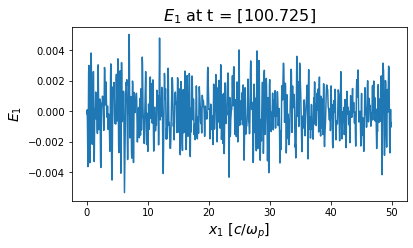

In [4]:
dirname = 'v02-v08'
osiris.field(rundir=dirname,time=100)

Next, run the next cell to plot $E_1(t)$ at $x_1=5 c/\omega_p$ (i.e., at cell=100). 
* Do you see any evidence of a plasma wave or oscillation? 
* Does the plot make sense?

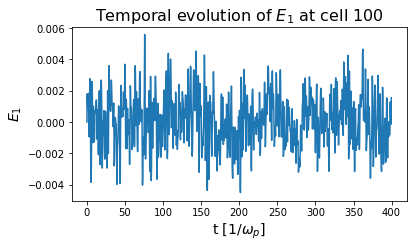

In [5]:
dirname = 'v02-v08'
osiris.field(rundir=dirname,space=100)

Next, in the following two cells, we are going to plot $\omega(k)$ and look for the dispersion relation generated by particles in our thermal plasma.
* This is generated by taking $E_1(x_1,t)$ and Fourier analyzing in both position and time.
* The plots with red overlaid curves can be used for comparison against the theoretical dispersion relation shown above, namely $\omega^2 = \omega_p^2 + 3 v_{the}^2 k^2$
* We will use two different units for wavenumber

-------
* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

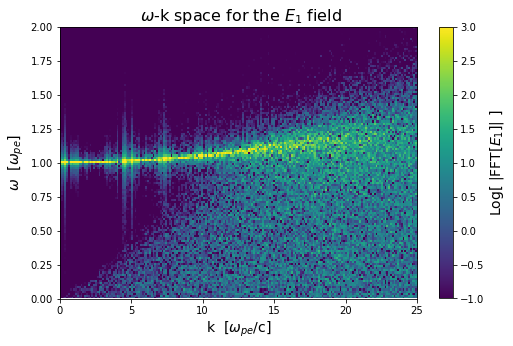

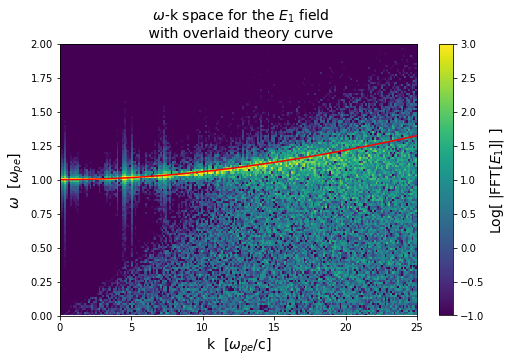

In [3]:
dirname = 'v02-v08'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.02, vmin=-1, vmax=3)
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.02, vmin=-1, vmax=3, show_theory=True) 

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

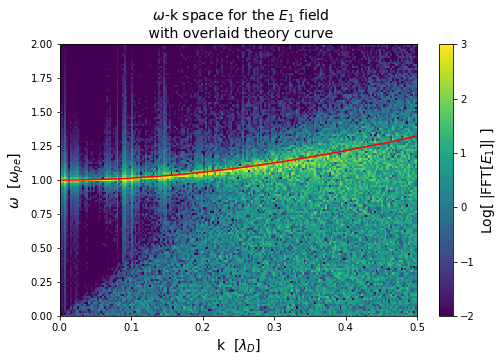

In [6]:
dirname = 'v02-v08'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,0.5], vth = 0.02, vmin=-2, vmax=3, show_theory=True, debye=True) 

<IPython.core.display.Javascript object>


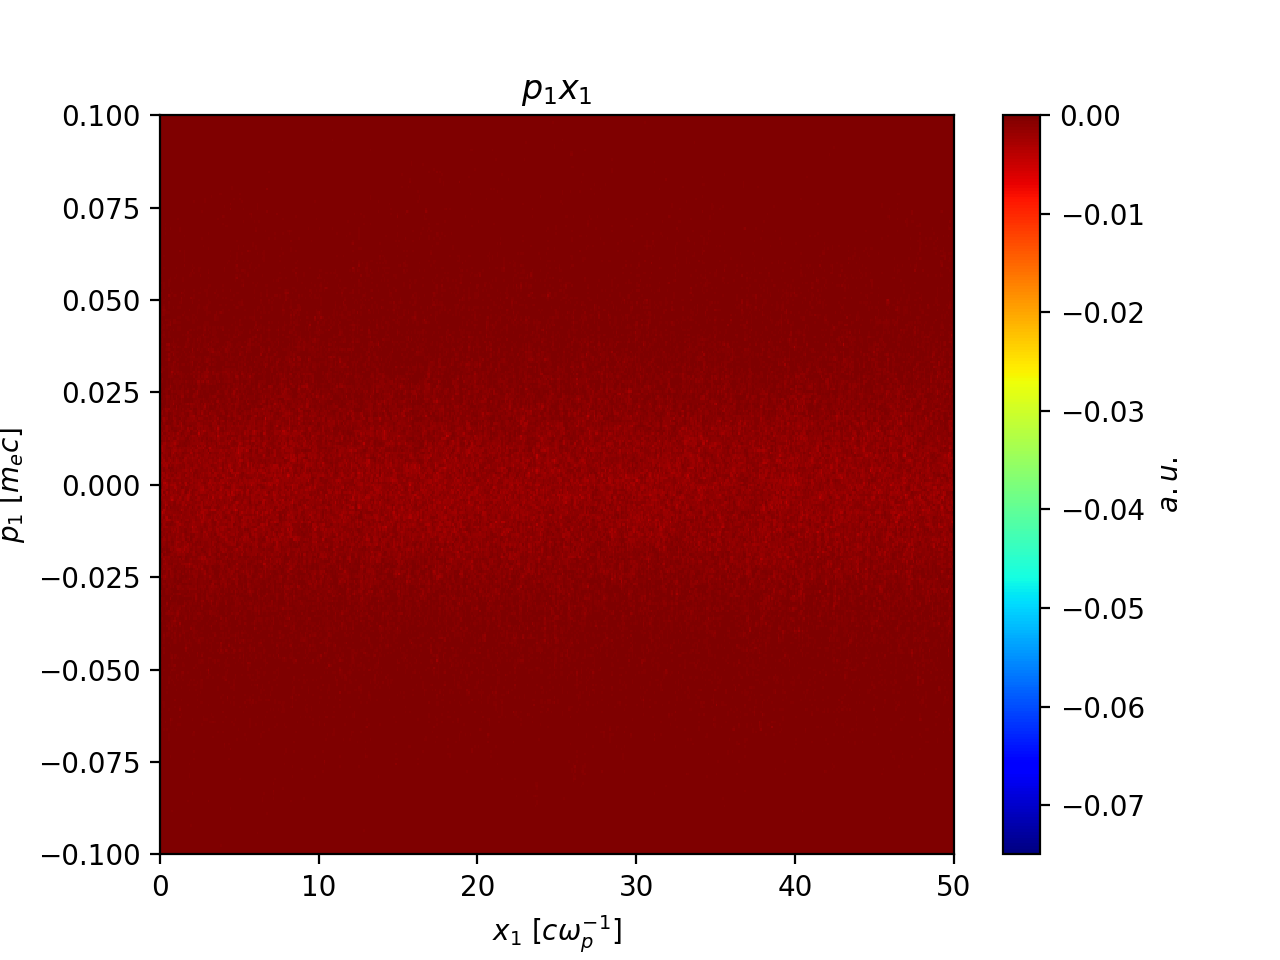

In [2]:
dirname = 'v02-v08'
%matplotlib notebook
import osh5def
import ipywidgets
import osh5visipy

osh5visipy.slicer_w(dirname+'/MS/PHA/p1x1/tests/')

##### I would like you to think about units:
* What do you think are the natural units for $\omega$? 
* What about k? 

We are plotting them in what are called normalized units (not inverse time or inverse distance). We use two choices ($\omega/\omega_p$ and $kc/\omega_p$) and ($\omega/\omega_p$ and $kv_{th}/\omega_p = k\lambda_D$).

We also plot the theory curve:
* Does it make sense? 
* Why do you think it agrees better for smaller wave numbers?
* At what wave number does the theory plot stop working as well? 
* Can you explain why this happens?

In [ ]:
# vth/c = 0.05
dirname = 'v05'
osiris.runosiris(rundir=dirname,inputfile='v05.txt')

Make $\omega(k)$ plots for this case too by running the cells below.

* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

In [ ]:
dirname = 'v05'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.05, vmin=-1, vmax=3)
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.05, vmin=-1, vmax=3, show_theory=True) 

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

In [ ]:
dirname = 'v05'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,0.5], vth = 0.05, vmin=-2, vmax=3, show_theory=True, debye=True) 

### Questions
* Do the $\omega(k)$ plots make sense? 
* For which normalized units do the plots look similar to the case above with $vth_1=vth_2=vth_3=0.02 c$?

## Run a case in which $vth_1=vth_2=vth_3=0.20 c$.

In [ ]:
# vth/c = 0.2
dirname = 'v20'
osiris.runosiris(rundir=dirname,inputfile='v20.txt')

Make $\omega(k)$ plots for this case by running the cells below.

* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

In [ ]:
dirname = 'v20'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.20, vmin=0, vmax=5)
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.20, vmin=0, vmax=5, show_theory=True) 

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

In [ ]:
dirname = 'v20'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,0.5], vth = 0.20, vmin=0, vmax=5, show_theory=True, debye=True)

### Questions

* Do the $\omega(k)$ plots make sense? 

* For which normalized units do the plots look similar to the prior cases with $vth_1=vth_2=vth_3=0.02 c$ and $0.05c$?

* Look closely at $k=0$ by running the next cell. The frequency does not agree as well with theory as the prior cases did. 
 * Is it higher or lower than theory? 
 * Can you think of a reason why?

In [ ]:
dirname = 'v20'
osiris.plot_wk(rundir=dirname, wlim=[0.75,1.25], klim=[0,0.05], vth = 0.20, vmin=0, vmax=5, show_theory=True, debye=True)